# Digit Classification Tutorial
Neural Netorks using Tensorflow 2.0  
Patrick Old

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
# set some globals, which are used across the remaining functions
IMAGE_SHAPE = (28,28,1)
NUM_CLASSES = 10
# training parameters
NUM_EPOCHS = 20
BATCH_SIZE = 128

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

y_train = train_df['label']
X_train = train_df.drop('label', axis=1)
X_test = test_df

In [4]:
X_train = X_train.to_numpy().reshape(42000, 28, 28)
X_test = X_test.to_numpy().reshape(28000, 28, 28)

In [5]:
y_train = y_train.to_numpy()

### Show Image

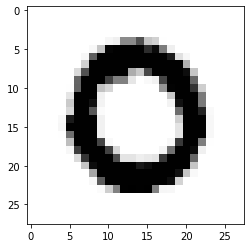

In [6]:
image_index = 1 # You may select anything up to 60,000
#print(img_names[y_train[image_index][0]]) # Print the label
plt.imshow(X_train[image_index], cmap='Greys') # Show the image

### Data Cleansing
Scaling all values to be between 0-1 for gradient descent to work properly

In [7]:
X_train = (X_train.astype('float32') / 255.0)
X_test = (X_test.astype('float32') / 255.0)

### Create Neural Network
Create an arbitrary sequential neural network that is sequential and fully connected.

In [8]:
model = Sequential()

model.add(Flatten(input_shape=[28,28])) # Change from 2-D to 1-D (28*28 neurons in input layer)

# Create Pyramid-like sequence for neural net
model.add(Dense(300, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="tanh"))
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation='softmax')) # output activation should be softmax for classication > 2 output classes

### View the Neural Network

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_split=0.1)

Epoch 1/20
1182/1182 [==============================] - 3s 2ms/step - loss: 0.8590 - accuracy: 0.7669 - val_loss: 0.3568 - val_accuracy: 0.8998
Epoch 2/20
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2766 - accuracy: 0.9192 - val_loss: 0.2323 - val_accuracy: 0.9362
Epoch 3/20
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1995 - accuracy: 0.9411 - val_loss: 0.1914 - val_accuracy: 0.9436
Epoch 4/20
1182/1182 [==============================] - 3s 2ms/step - loss: 0.1567 - accuracy: 0.9543 - val_loss: 0.1592 - val_accuracy: 0.9510
Epoch 5/20
1182/1182 [==============================] - 3s 2ms/step - loss: 0.1280 - accuracy: 0.9624 - val_loss: 0.1417 - val_accuracy: 0.9569
Epoch 6/20
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1079 - accuracy: 0.9687 - val_loss: 0.1678 - val_accuracy: 0.9450
Epoch 7/20
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0913 - accuracy: 0.9734 - val_loss: 0.1306 - val_accuracy:

### Show Images and Predictions

Below the 10 images for the test class are shown, along with their predictions in the following cell.

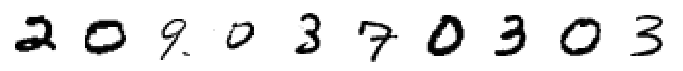

In [12]:
n_rows = 1
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [13]:
model.predict_classes(X_test[:10])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3])

# Convolutional Neural Network

Convolutional neural networks are excellent for computer vision tasks, and should perform better than the above fully-connected neural net with almost only dense layers. This will require a bit more pre-processing so layers such as Conv2d and Max Pooling can be used.

In [14]:
K.clear_session()

from tensorflow.keras.utils import to_categorical

print('Before preprocessing:')
print(' - X_train.shape = {}, y_train.shape = {}'.format(X_train.shape, y_train.shape))
print(' - X_test.shape = {}'.format(X_test.shape))

# one-hot encode labels to 10 output classes corresponding to digits 0-9
y_train = to_categorical(y_train, 10)

# reshape the image arrays (make 2D arrays instead of 3D arrays)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

print('After preprocessing: ')
print(' - X_train.shape = {}, y_train.shape = {}'.format(X_train.shape, y_train.shape))
print(' - X_test.shape = {}'.format(X_test.shape))

Before preprocessing:
 - X_train.shape = (42000, 28, 28), y_train.shape = (42000,)
 - X_test.shape = (28000, 28, 28)
After preprocessing: 
 - X_train.shape = (42000, 28, 28, 1), y_train.shape = (42000, 10)
 - X_test.shape = (28000, 28, 28, 1)


In [15]:
def build_model():
    K.clear_session()
    
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
                    input_shape=IMAGE_SHAPE))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
                input_shape=IMAGE_SHAPE))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dropout(0.45))
    # output is softmax for 10 classes
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    adam = optimizers.Adam(lr=0.001)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          3

In [16]:
# train the model
history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, validation_split=0.1)

Epoch 1/20
296/296 [==============================] - 35s 117ms/step - loss: 0.5212 - acc: 0.8337 - val_loss: 0.1111 - val_acc: 0.9645
Epoch 2/20
296/296 [==============================] - 35s 118ms/step - loss: 0.1678 - acc: 0.9513 - val_loss: 0.0680 - val_acc: 0.9788
Epoch 3/20
296/296 [==============================] - 35s 119ms/step - loss: 0.1143 - acc: 0.9672 - val_loss: 0.0564 - val_acc: 0.9810
Epoch 4/20
296/296 [==============================] - 35s 119ms/step - loss: 0.0942 - acc: 0.9727 - val_loss: 0.0484 - val_acc: 0.9836
Epoch 5/20
296/296 [==============================] - 36s 121ms/step - loss: 0.0785 - acc: 0.9774 - val_loss: 0.0458 - val_acc: 0.9852
Epoch 6/20
296/296 [==============================] - 36s 121ms/step - loss: 0.0647 - acc: 0.9801 - val_loss: 0.0335 - val_acc: 0.9888
Epoch 7/20
296/296 [==============================] - 36s 120ms/step - loss: 0.0617 - acc: 0.9814 - val_loss: 0.0448 - val_acc: 0.9879
Epoch 8/20
296/296 [==============================] - 3

### Show Images and Predictions

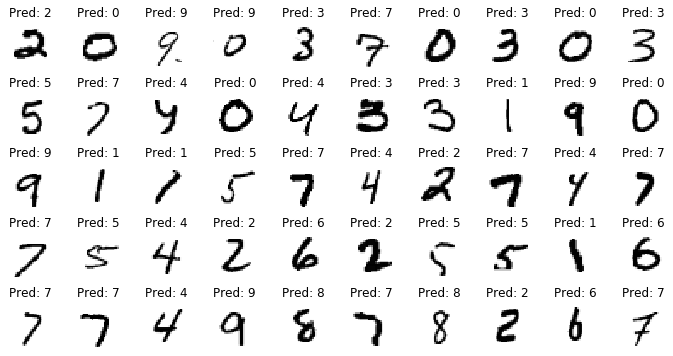

In [17]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index].mean(axis=2), cmap="binary", interpolation="nearest")
        pred = model.predict_classes(X_test[index:index+1])[0]
        plt.title("Pred: {}".format(pred))
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Conduct Final Predictions For Kaggle Test Set

In [18]:
preds = model.predict_classes(X_test)
output_dict = {"ImageId": np.arange(1, len(preds) + 1, 1), "label": preds}
preds_df = pd.DataFrame(output_dict)

In [19]:
preds_df.to_csv("mnist_conv_net.csv", index=False)